> <b>Predicting Restaurant Food Cost</b>


Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

Dataset: https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Restaurant_food_cost.rar

Size of training set: 12,690 records

Size of test set: 4,231 records



Size of training set: 12,690 records

Size of test set: 4,231 records

<b>FEATURES:</b>
<b>TITLE:</b> The feature of the restaurant which can help identify what and for whom it is suitable for.

<b>RESTAURANT_ID:</b> A unique ID for each restaurant.

<b>CUISINES:</b> The variety of cuisines that the restaurant offers.

<b>TIME:</b> The open hours of the restaurant.

<b>CITY:</b> The city in which the restaurant is located.

<b>LOCALITY:</b> The locality of the restaurant.

<b>RATING:</b> The average rating of the restaurant by customers.

<b>VOTES:</b> The overall votes received by the restaurant.

<b>COST:</b> The average cost of a two-person meal.

<b>Importing Necessary Libraries</b>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import r2_score
import missingno as msno 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

In [8]:
os.chdir("C:/Users/SANKET/Music/Projects/Restaurant_food_cost/Participants_Data_Final")

In [9]:
# Reading the data
train_food=pd.read_excel("Data_Train.xlsx")
test_food=pd.read_excel("Data_Test.xlsx")

In [10]:
# Merging the datasets
cost_data=pd.concat([train_food, test_food],ignore_index=True)
cost_data.head()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes


In [11]:
cost_data.shape

(16921, 9)

<b>Observation:</b>
There are 16921 rows and 9 columns in the dataset.

In [12]:
# Removing the unnecessary columns from the dataset
cost_data.drop(["RESTAURANT_ID","TIME"],axis=1,inplace=True)

In [13]:
cost_data.dtypes

CITY         object
COST        float64
CUISINES     object
LOCALITY     object
RATING       object
TITLE        object
VOTES        object
dtype: object

<b>Observation:</b>
There are 6 attributes left in the dataset, out of which 4 attributes are of object datatype and 1 attribute(COST) is of float datatype.

<b>Checking the Null Values</b>

In [14]:
cost_data.isnull().sum()

CITY         147
COST        4231
CUISINES       0
LOCALITY     128
RATING         4
TITLE          0
VOTES       1606
dtype: int64

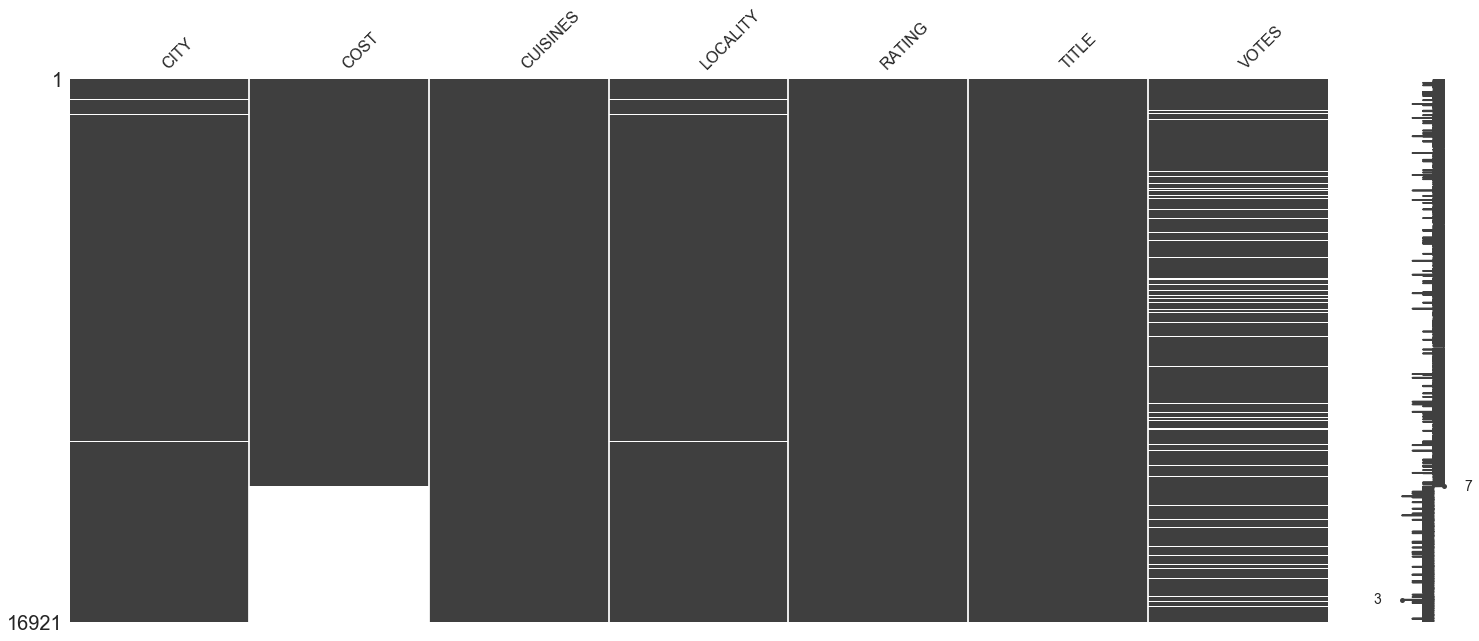

In [15]:
msno.matrix(cost_data) 
plt.show()

<b>Observation:</b>
From the above Visualization, we see that there are missing values in the attributes(CITY,COST,LOCALITY,RATING,VOTES).

<b>Exploring the Attributes</b>

In [16]:
cost_data.VOTES.value_counts()

44 votes      92
22 votes      88
6 votes       87
29 votes      83
28 votes      81
26 votes      81
24 votes      81
23 votes      80
25 votes      79
35 votes      78
33 votes      77
38 votes      76
57 votes      75
42 votes      75
4 votes       75
32 votes      74
13 votes      74
12 votes      74
15 votes      73
27 votes      73
19 votes      73
54 votes      73
31 votes      72
37 votes      71
55 votes      71
47 votes      71
20 votes      71
52 votes      71
8 votes       71
41 votes      70
              ..
6457 votes     1
1094 votes     1
1135 votes     1
7549 votes     1
3173 votes     1
1668 votes     1
1757 votes     1
2276 votes     1
1181 votes     1
2102 votes     1
2971 votes     1
2728 votes     1
1861 votes     1
3007 votes     1
942 votes      1
2132 votes     1
1108 votes     1
1324 votes     1
2199 votes     1
3913 votes     1
1554 votes     1
1828 votes     1
2877 votes     1
1513 votes     1
9005 votes     1
3968 votes     1
2408 votes     1
2577 votes    

attribute(VOTES) has 1606 (0).

<b>Filling NULL Values</b>

In [17]:
# As VOTES hasa "new" in one of its rows, we are replacing it with 0
cost_data["RATING"].replace("NEW",0, inplace=True)
cost_data["RATING"].fillna('-',inplace=True)
cost_data["RATING"].fillna(0,inplace=True)

In [18]:
# Analysing the VOTES column, it can be converted to int by stripping off votes
cost_data["VOTES"]= cost_data["VOTES"].str.replace(r'\D','')
cost_data.dropna(subset=["VOTES"],axis=0,inplace=True)
# Converting attribute into int datatype
cost_data["VOTES"]=cost_data["VOTES"].astype(int)

In [19]:
# Checking the Duplicates
print("There are duplicates in the dataset:",cost_data.duplicated().sum())

# Dropping the Duplicates
cost_data=cost_data.drop_duplicates()
print("After removing duplicates:",cost_data.duplicated().sum())

There are duplicates in the dataset: 22
After removing duplicates: 0


In [20]:
# Filling the missing values of categorical attributes using mode
for column in cost_data[["CITY","LOCALITY"]]:
    mode = cost_data[column].mode()
    cost_data[column] = cost_data[column].fillna(mode)[0]

In [21]:
# Filling the missing values of numerical attributes using mean
cost_data['COST'] = cost_data['COST'].fillna(cost_data['COST'].mean())

In [22]:
# Changing the datatype of Rating
cost_data['RATING'] = cost_data['RATING'].astype('float')

In [23]:
cost_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15293 entries, 0 to 16920
Data columns (total 7 columns):
CITY        15293 non-null object
COST        15293 non-null float64
CUISINES    15293 non-null object
LOCALITY    15293 non-null object
RATING      15293 non-null float64
TITLE       15293 non-null object
VOTES       15293 non-null int32
dtypes: float64(2), int32(1), object(4)
memory usage: 1.5+ MB


In [24]:
cost_data.isnull().sum()

CITY        0
COST        0
CUISINES    0
LOCALITY    0
RATING      0
TITLE       0
VOTES       0
dtype: int64

In [25]:
#Now we will find maximum number of cuisines resutarnt are serving
MAX_CUISINES=-1
for i in range(len(cost_data["CUISINES"])):
    temp=len(cost_data["CUISINES"].iloc[i].split(","))
    if temp>MAX_CUISINES:
        MAX_CUISINES=temp
print("Max number of cuisines serverd are :{}".format(MAX_CUISINES))

Max number of cuisines serverd are :8


In [26]:
C1=list()
C2=list()
C3=list()
C4=list()
C5=list()
C6=list()
C7=list()
C8=list()
for i in range(len(cost_data["CUISINES"])):
    temp=cost_data["CUISINES"].iloc[i].split(",")
    try :
        C1.append(temp[0].strip().upper())
    except :
        C1.append('NONE')
    try :
        C2.append(temp[1].strip().upper())
    except :
        C2.append('NONE')
    try :
        C3.append(temp[2].strip().upper())
    except :
        C3.append('NONE')
    try :
        C4.append(temp[3].strip().upper())
    except :
        C4.append('NONE')
    try :
        C5.append(temp[4].strip().upper())
    except :
        C5.append('NONE')
    try :
        C6.append(temp[5].strip().upper())
    except :
        C6.append('NONE')
    try :
        C7.append(temp[6].strip().upper())
    except :
        C7.append('NONE')
    try :
        C8.append(temp[7].strip().upper())
    except :
        C8.append('NONE')
        
cost_data["C1"]=C1
cost_data["C2"]=C2
cost_data["C3"]=C3
cost_data["C4"]=C4
cost_data["C5"]=C5
cost_data["C6"]=C6
cost_data["C7"]=C7
cost_data["C8"]=C8

In [27]:
#Now we will divide the "TITLE" column into multiple columns
#First we will find maximum number of TITLE resutarnt having
max_titles=-1
for i in range(len(cost_data["TITLE"])):
    temp=len(cost_data["TITLE"].iloc[i].split(","))
    if temp>max_titles:
        max_titles=temp
print("Max number of titles are :{}".format(max_titles))

Max number of titles are :2


In [28]:
T1=list()
T2=list()
for i in range(len(cost_data["TITLE"])):
    temp=cost_data["TITLE"].iloc[i].split(",")
    try :
        T1.append(temp[0].strip().upper())
    except :
        T1.append('NONE')
    try :
        T2.append(temp[1].strip().upper())
    except :
        T2.append('NONE')

cost_data["T1"]=T1
cost_data["T2"]=T2

In [29]:
cost_data.head(3)

,CITY,COST,CUISINES,LOCALITY,RATING,TITLE,VOTES,C1,C2,C3,C4,C5,C6,C7,C8,T1,T2
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,CASUAL DINING,49,MALWANI,GOAN,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE,CASUAL DINING,NONE
1,Thane,1500.0,"Asian, Modern Indian, Japanese",Dombivali East,4.2,"CASUAL DINING,BAR",30,ASIAN,MODERN INDIAN,JAPANESE,NONE,NONE,NONE,NONE,NONE,CASUAL DINING,BAR
2,Thane,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Dombivali East,3.8,CASUAL DINING,221,NORTH INDIAN,CHINESE,BIRYANI,HYDERABADI,NONE,NONE,NONE,NONE,CASUAL DINING,NONE


In [30]:
# We can drop CUISINE and TITLE columns
cost_data.drop(["CUISINES","TITLE"],axis=1,inplace=True)

<b>Exploratotry Data Analysis</b>

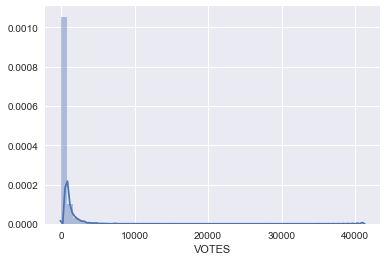

In [44]:
sns.distplot(cost_data["VOTES"])

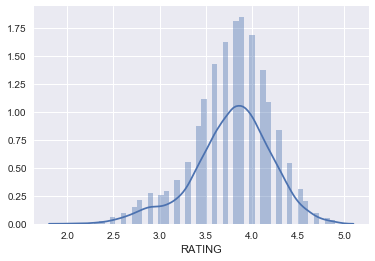

In [34]:
sns.distplot(cost_data["RATING"])

<b>Label Encoder</b>

In [45]:
# Converting the categorical variables 
l=LabelEncoder()
for col in cost_data.columns:
    if cost_data[col].dtype=="object":
        cost_data[col]=l.fit_transform(cost_data[col])

<b>Dividing the input and output variables</b>

In [46]:
X= cost_data.drop(["COST"],axis=1)
y= cost_data["COST"]

In [47]:
# Lets bring the dataset features into same scle
from sklearn.preprocessing import StandardScaler
sr=StandardScaler()
X=sr.fit_transform(X)

<b>Splitting the data into train and test(70:30)</b>

In [48]:
# Splitting the data into train and test(70:30) ratio
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3)

In [49]:
# We are using R2 score to evaluate
def max_r2_score(mod,X,y):
    max_r2_score=0
    for r_state in range(42,100):
        X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.30, random_state=r_state)
        mod.fit(X_train,y_train)
        y_pred= mod.predict(X_test)
        score=r2_score(y_test,y_pred)
        if score>max_r2_score:
            max_r2_score=score
            final_r2_score=r_state
    print("Maximum R2_Score corresponding:",final_r2_score," and it is :",round((max_r2_score),2))

# Machine Learning Models:

As the target variable(COST) is numeric, its regression problem. We are implementing Decision Tree Regressor, Linear Regression, Random Forest Regressor, Gradient Boosting Regressor and SVM Regressor.

<b>Decision Tree Regressor</b>

In [50]:
model1=DecisionTreeRegressor()
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 60],
              "max_depth": [2,4,10],
              "min_samples_leaf": [40, 60, 80],
              "max_leaf_nodes": [5, 20, 60],
              }
model1=GridSearchCV(model1,param_grid,cv=10)
model1.fit(X,y)
model1.best_params_

{'criterion': 'mae',
 'max_depth': 2,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 60,
 'min_samples_split': 10}

In [51]:
model1=DecisionTreeRegressor(criterion="mae",max_depth=2,max_leaf_nodes=20,min_samples_leaf=60,min_samples_split=10)
max_r2_score(model1,X,y)

Maximum R2_Score corresponding: 72  and it is : 0.17


In [52]:
pred_model1= model1.predict(X_test)
score_model1= model1.score(X_test, y_test)

In [53]:
# Cross validation score
from sklearn.model_selection import cross_val_score
mean_dt=cross_val_score(model1,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for Decision Tree Regressor:",mean_dt)
std_dt=cross_val_score(model1,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for Decision Tree Regressor:",std_dt)

Mean R2 Score for Decision Tree Regressor: -2.1706096304070778e+29
Standard Deviation in R2 Score for Decision Tree Regressor: 4.345414351828639e+29


In [55]:
from sklearn import metrics
model1_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_model1))
model1_rmse

490.002264420509

<b>Gradient Boosting Regressor</b>

In [56]:
model2 = GradientBoostingRegressor()
parameters= {'learning_rate': [0.02,0.03], 'subsample': [0.5,0.7], 'n_estimators': [50,100], 'max_depth': [6,10]}
model2= GridSearchCV(estimator=model2, param_grid= parameters, cv=5, n_jobs=-1)
model2.fit(X,y)
model2.best_params_

{'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 50, 'subsample': 0.5}

In [57]:
model2 = GradientBoostingRegressor(learning_rate=0.02,max_depth=6,n_estimators=50,subsample=0.5)
max_r2_score(model2,X,y)

Maximum R2_Score corresponding: 72  and it is : 0.47


In [58]:
pred_model2= model2.predict(X_test)
score_model2= model2.score(X_test, y_test)

In [59]:
# Cross validation score
mean_model2=cross_val_score(model2,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for Gradient Boosting Regressor:",mean_model2)
std_model2=cross_val_score(model2,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for Gradient Boosting Regression:",std_model2)

Mean R2 Score for Gradient Boosting Regressor: -2.9665510680060595e+29
Standard Deviation in R2 Score for Gradient Boosting Regression: 5.9427521677260875e+29


In [60]:
# RMSE
from sklearn import metrics
model2_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_model2))
model2_rmse

382.58502914141735

<b>Random Forest Regressor</b>

In [62]:
model3=RandomForestRegressor()
param_grid = {
    'max_depth': [80, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [10, 12],
    'n_estimators': [100, 500]
}
model3= GridSearchCV(model3, param_grid,cv=5)
model3.fit(X,y)
model3.best_params_

{'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}

In [64]:
model3=RandomForestRegressor(max_depth=100,max_features=2,min_samples_leaf=5,min_samples_split=12,n_estimators=100)
max_r2_score(model3,X,y)

Maximum R2_Score corresponding: 72  and it is : 0.46


In [65]:
pred_model3= model3.predict(X_test)
score_model3= model3.score(X_test, y_test)

In [66]:
# Cross validation score
mean_rf=cross_val_score(model3,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for Random Forest Regressor:",mean_rf)
std_rf=cross_val_score(model3,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for Random Forest Regression:",std_rf)

Mean R2 Score for Random Forest Regressor: -3.326047795209187e+29
Standard Deviation in R2 Score for Random Forest Regression: 7.362707078367388e+29


In [67]:
# RMSE
rf_se=np.sqrt(mean_squared_error(y_test,pred_model3))
rf_se

375.8185650606107

# Evaluation:

In [68]:
#Lets initialise the data frame with columns model with r2_score and RMSE value
evaluate= [["Decision Tree Regressor",model1_rmse],["Gradient Boosting Regressor",model2_rmse],["Random Forest Regressor",rf_se]]
result= pd.DataFrame(evaluate, columns=["Model Name","RMSE"], index=[1,2,3])
result

,Model Name,RMSE
1,Decision Tree Regressor,490.002264
2,Gradient Boosting Regressor,382.585029
3,Random Forest Regressor,375.818565


<b>Observations:</b>
<li> As the target variable is numerical, we have calculated R2 Score and evaluated RMSE for the performance of the models.</li>
<li>From the above Model Evaluation, we can see that Random Forest Regressor performed well with lowest RMSE (375.818565).</li>

<b>Saving the Prediction</b>

As the Random Forest regressor performed well among all the models, we are saving the prediction.

In [69]:
np.savetxt('Model19.csv',pred_model3,delimiter=',')

In [70]:
#Lets save the above model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(model3, 'project19.pkl')

['project19.pkl']